# Data Analysis with Scikit-learn
In this short tutorial I illustrate a complete data analysis process which exploits the `scikit-learn` Python library. The process includes
* preprocessing, which includes features selection, normalization and balancing
* model selection with parameters tuning
* model evaluation

## Load Dataset
Firstly, I load the dataset through the Python `pandas` library. I exploit the `heart.csv` dataset, provided by the [Kaggle repository](https://www.kaggle.com/rashikrahmanpritom/heart-attack-analysis-prediction-dataset).

In [132]:
import pandas as pd

df = pd.read_csv('source/heart.csv')
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [133]:
df.shape

(303, 14)

## Features selection
Now, I split the columns of the dataset in input (`X`) and output (`Y`). I use all the columns but `output` as input features. 

In [134]:
features = []
for column in df.columns:
    if column != 'output':
        features.append(column)
features

['age',
 'sex',
 'cp',
 'trtbps',
 'chol',
 'fbs',
 'restecg',
 'thalachh',
 'exng',
 'oldpeak',
 'slp',
 'caa',
 'thall']

In [135]:
X = df[features]
Y = df['output']

In order to select the minimum set of input features, I calculate the Pearson correlation coefficient among features, through `corr()` function, provided by a `pandas dataframe`.

In [136]:
X.corr()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736
trtbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981
thalachh,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439
exng,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244


I note that all the features have a low correlation, thus I can keep all of them as input features.

## Data Normalization
Data Normalization scales all the features in the same interval. I exploit the `MinMaxScaler()` provided by the `scikit-learn` library. I dealt with Data Normalization in `scikit-learn` in my [previous article](https://towardsdatascience.com/data-normalization-with-python-scikit-learn-e9c5640fed58), while I [this](https://towardsdatascience.com/data-preprocessing-with-python-pandas-part-3-normalisation-5b5392d27673) article I described the general process of Data Normalization without `scikit-learn`.

In [137]:
X.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000


For each input feature I calculate the `MinMaxScaler()` and I store the result in the same `X` column. The `MinMaxScaler()` must be fitted firstly through the `fit()` function and then can be applied for a transformation through the `transform()` function. Note that I must reshape every feature in the format (-1,1) in order to be passed as input parameter of the scaler. For example, `Reshape(-1,1)` transforms the array `[0,1,2,3,5]` into `[[0],[1],[2],[3],[5]]`.

In [138]:
from sklearn.preprocessing import MinMaxScaler

for column in X.columns:
    feature = np.array(X[column]).reshape(-1,1)
    scaler = MinMaxScaler()
    scaler.fit(feature)
    feature_scaled = scaler.transform(feature)
    X[column] = feature_scaled.reshape(1,-1)[0]

<ipython-input-138-758a46f9f707>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[column] = feature_scaled.reshape(1,-1)[0]
<ipython-input-138-758a46f9f707>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[column] = feature_scaled.reshape(1,-1)[0]
<ipython-input-138-758a46f9f707>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs

In [139]:
X.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,0.528465,0.683168,0.322332,0.354941,0.274575,0.148515,0.264026,0.600358,0.326733,0.167678,0.699670,0.182343,0.771177
std,0.189210,0.466011,0.344017,0.165454,0.118335,0.356198,0.262930,0.174849,0.469794,0.187270,0.308113,0.255652,0.204092
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.385417,0.000000,0.000000,0.245283,0.194064,0.000000,0.000000,0.477099,0.000000,0.000000,0.500000,0.000000,0.666667
50%,0.541667,1.000000,0.333333,0.339623,0.260274,0.000000,0.500000,0.625954,0.000000,0.129032,0.500000,0.000000,0.666667
75%,0.666667,1.000000,0.666667,0.433962,0.339041,0.000000,0.500000,0.725191,1.000000,0.258065,1.000000,0.250000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Split the dataset in Training and Test
Now I split the dataset into two parts: training and testset. The test set size is 20% of the whole dataset. I exploit the `scikit-learn` function `train_test_split()`. I will use the training set to train the model and the testset to test the performance of the model.

In [140]:
import numpy as np
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.20, random_state=42)

## Balancing
I check whether the dataset is balanced or not, i.e. if the output classes in the training set are equally represented. I can use the `value_counts()` function to calculate the number of records in each output class.

In [141]:
y_train.value_counts()

1    133
0    109
Name: output, dtype: int64

The output classes are not balanced, thus I can balance it. I can exploit the `imblearn` library, to perform balancing. I try both oversampling the minority class and undersampling the majority class. More details related to the Imbalanced Learn library can be found [here](https://imbalanced-learn.org/stable/).
Firstly, I perform over sampling through the `RandomOverSampler()`. I create the model and then I fit with the training set. The `fit_resample()` function returns the balanced training set.

In [142]:
from imblearn.over_sampling import RandomOverSampler
over_sampler = RandomOverSampler(random_state=42)
X_bal_over, y_bal_over = over_sampler.fit_resample(X_train, y_train)

I calculate the number of records in each class through the `value_counts()` function and I note that now the dataset is balanced.

In [143]:
y_bal_over.value_counts()

1    133
0    133
Name: output, dtype: int64

Secondly, I perform under sampling through the `RandomUnderSampler()` model.

In [144]:
from imblearn.under_sampling import RandomUnderSampler

under_sampler = RandomUnderSampler(random_state=42)
X_bal_under, y_bal_under = under_sampler.fit_resample(X_train, y_train)

In [145]:
y_bal_under.value_counts()

1    109
0    109
Name: output, dtype: int64

## Model Selection and Training

Now, I'm ready to train the model. I choose a `KNeighborsClassifier` and firstly I train it with imbalanced data. I exploit the `fit()` function to train the model and then the`predict_proba()` function to predict the values of the test set.

In [120]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)
y_score = model.predict_proba(X_test)

I calculate the performance of the model. In particular, I calculate the `roc_curve()` and the `precision_recall()` and  then I plot them. I exploit the `scikitplot` library to plot curves. 

From the plot I note that there is a roc curve for each class. With respect to the precision recall curve, the class 1 works better than class 0, probably because it is represented by a greater number of samples.

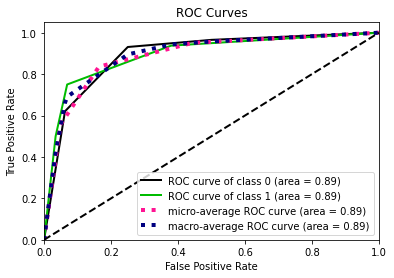

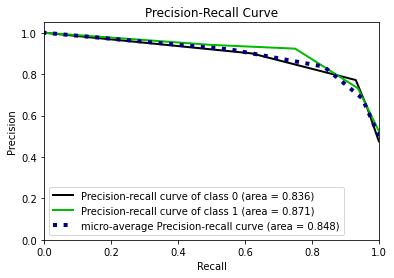

In [121]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from scikitplot.metrics import plot_roc,auc
from scikitplot.metrics import plot_precision_recall

fpr0, tpr0, thresholds = roc_curve(y_test, y_score[:, 1])

# Plot metrics 
plot_roc(y_test, y_score)
plt.show()
    
plot_precision_recall(y_test, y_score)
plt.show()

Now, I recalculate the same things with oversampling balancing. I note that the precision recall curve of class 0 increases, while that of class 1 decreases.

In [122]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_bal_over, y_bal_over)
y_score = model.predict_proba(X_test)

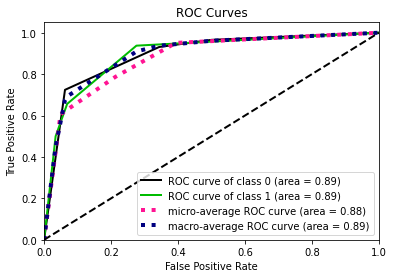

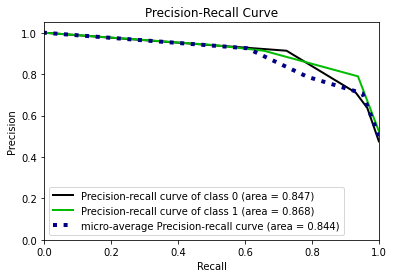

In [123]:
fpr0, tpr0, thresholds = roc_curve(y_test, y_score[:, 1])

# Plot metrics 
plot_roc(y_test, y_score)
plt.show()
    
plot_precision_recall(y_test, y_score)
plt.show()

Finally, I train the model through under sampled data and I note a general deterioration of the performance.

In [124]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_bal_under, y_bal_under)
y_score = model.predict_proba(X_test)

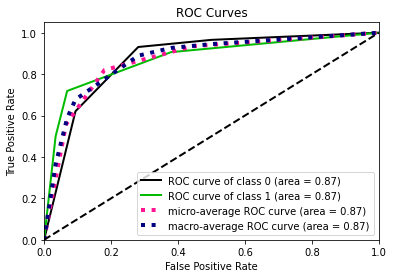

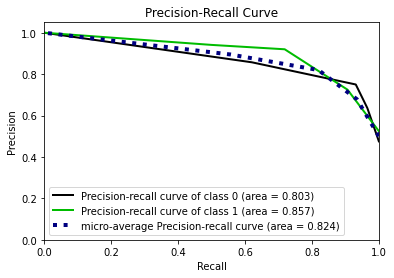

In [125]:
fpr0, tpr0, thresholds = roc_curve(y_test, y_score[:, 1])

# Plot metrics 
plot_roc(y_test, y_score)
plt.show()
    
plot_precision_recall(y_test, y_score)
plt.show()

## Parameters Tuning
In the last part of this tutorial, I try to improve the performance of the model by searching for best parameters for my model. I exploit the `GridSearchCV` mechanism provided by the `scikit-learn` library. I select a range of values for each parameter to be tested and I put them in the `param_grid` variable. I create a `GridSearchCV()` object, I fit with the training set and then I retrieve the best estimator, contained in the `best_estimator_` variable.

In [126]:
from sklearn.model_selection import GridSearchCV

model = KNeighborsClassifier()

param_grid = {
   'n_neighbors': np.arange(2,8),
   'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'metric' : ['euclidean','manhattan','chebyshev','minkowski']
}

grid = GridSearchCV(model, param_grid = param_grid)
grid.fit(X_train, y_train)


best_estimator = grid.best_estimator_
best_estimator

KNeighborsClassifier(metric='manhattan')

I exploit the best estimator as model for my predictions and I calculate the performance of the algorithm.

In [127]:
best_estimator.fit(X_train, y_train)
y_score = best_estimator.predict_proba(X_test)

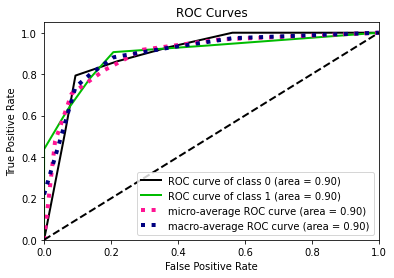

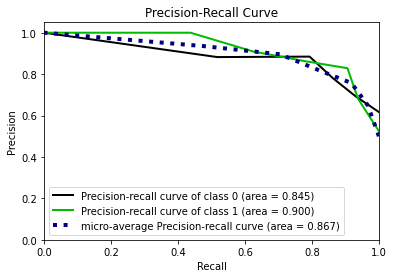

In [128]:
fpr0, tpr0, thresholds = roc_curve(y_test, y_score[:, 1])

# Plot metrics 
plot_roc(y_test, y_score)
plt.show()
    
plot_precision_recall(y_test, y_score)
plt.show()

I note that the roc curve has improved. I try now with the over sampled training set.

In [129]:
grid = GridSearchCV(model, param_grid = param_grid)
grid.fit(X_bal_over, y_bal_over)


best_estimator = grid.best_estimator_
best_estimator

KNeighborsClassifier(metric='manhattan')

In this case I obtain the best performance.

In [130]:
best_estimator.fit(X_bal_over, y_bal_over)
y_score = best_estimator.predict_proba(X_test)

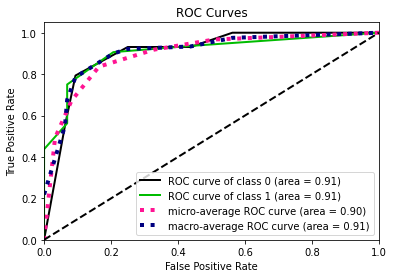

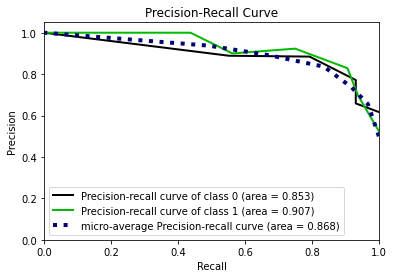

In [131]:
fpr0, tpr0, thresholds = roc_curve(y_test, y_score[:, 1])
roc_auc0 = auc(fpr0, tpr0)

# Plot metrics 
plot_roc(y_test, y_score)
plt.show()
    
plot_precision_recall(y_test, y_score)
plt.show()